<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"><h1>Visualization for Science</h1>
<h1>Pyramid Plot</h1>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: ad3ffea3caa8ee28fb0d84159eb14dadc58dd97a

pandas    : 1.1.3
json      : 2.0.9
numpy     : 1.19.2
watermark : 2.1.0
matplotlib: 3.3.2
seaborn   : 0.11.0



# Code

In [3]:
data = [["Country", "Vaccination", "Deaths"],
["IE", 93, 15],
["PT", 92, 10],
["MT", 92, 0],
["DK", 89, 10],
["BE", 87, 29],
["ES", 84, 4],
["FI", 83, 7],
["SE", 83, 3],
["IT", 82, 9],
["FR", 81, 7],
["DE", 81, 10],
["NL", 81, 17],
["CY", 80, 5],
["LU", 76, 13],
["AT", 74, 35],
["LT", 72, 69],
["GR", 72, 75],
["CZ", 69, 69],
["HU", 68, 135],
["EE", 67, 113],
["LV", 66, 266],
["SI", 64, 56],
["PL", 62, 49],
["HR", 55, 168],
["SK", 54, 29],
["RO", 43, 267],
["BG", 29, 325]]

In [4]:
data = pd.DataFrame.from_records(data[1:], columns=data[0])
data['y'] = np.arange(0, 27)

In [5]:
data

,Country,Vaccination,Deaths,y
0,IE,93,15,0
1,PT,92,10,1
2,MT,92,0,2
3,DK,89,10,3
4,BE,87,29,4
5,ES,84,4,5
6,FI,83,7,6
7,SE,83,3,7
8,IT,82,9,8
9,FR,81,7,9


We use seaborn's barplot axis function to generate the basic structure of the figure

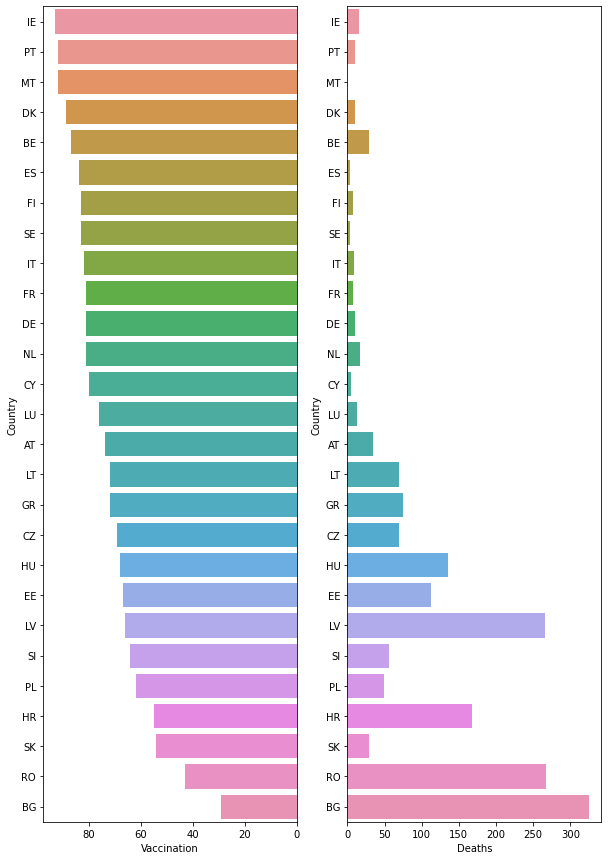

In [6]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 15))

sns.barplot(x=data['Vaccination'], y=data['Country'], ax=ax)
sns.barplot(x=data['Deaths'], y=data['Country'], ax=ax2)
ax.invert_xaxis()

Use sklearn's MinMaxScaler to scale Vaccination and Death values to be between 0 and 1. We'll use these scaled values to color the bars

In [7]:
data['Color_Vaccination'] = MinMaxScaler().fit_transform(data[['Vaccination']])
data['Color_Deaths'] = MinMaxScaler().fit_transform(data[['Deaths']])

Now we color the bars proportionally to their respective values. We invert the scale for Deaths to make larger values red instead of blue

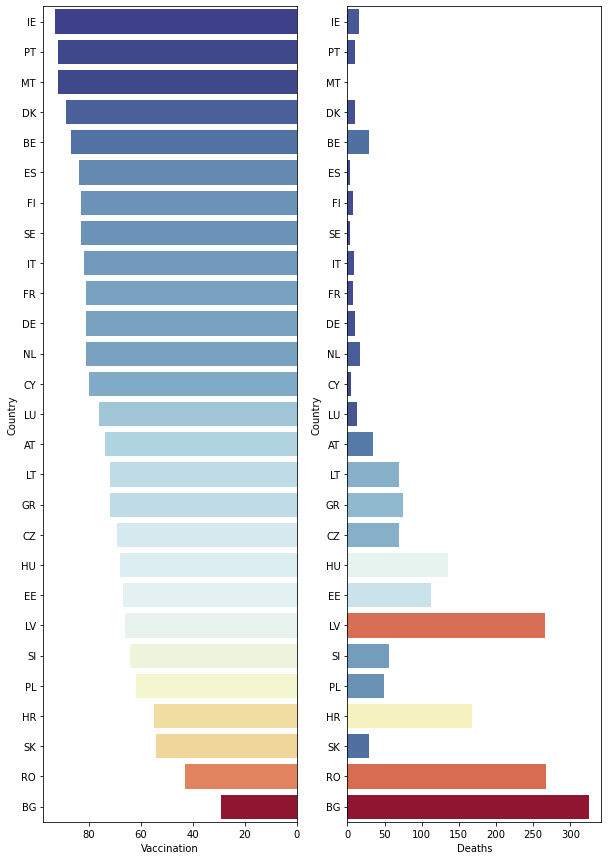

In [8]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 15))

sns.barplot(x=data['Vaccination'], y=data['Country'], ax=ax, 
            palette=plt.cm.RdYlBu(data['Color_Vaccination']))
sns.barplot(x=data['Deaths'], y=data['Country'], ax=ax2, 
            palette=plt.cm.RdYlBu_r(data['Color_Deaths']))
ax.invert_xaxis()

Remove the box decorations, leaving us with just the raw bars

(0.0, 341.25, 26.5, -0.5)

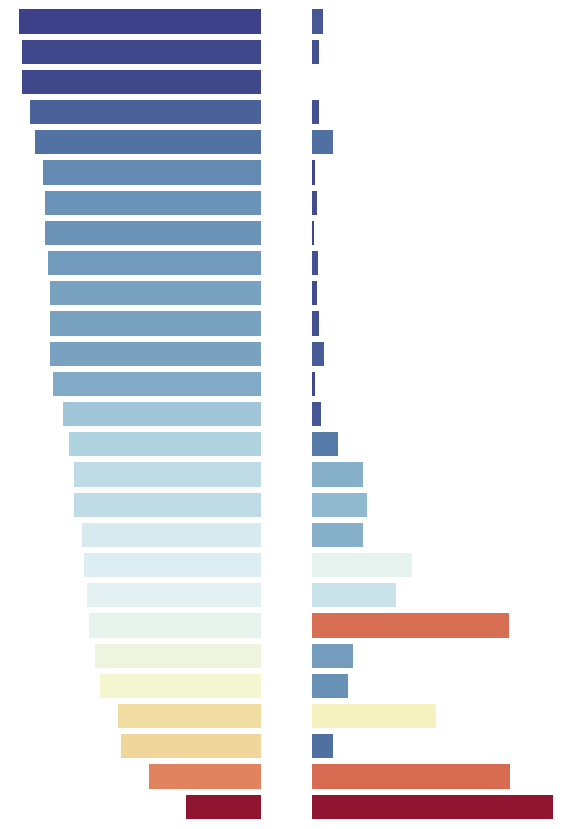

In [9]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 15))

sns.barplot(x=data['Vaccination'], y=data['Country'], ax=ax, 
            palette=plt.cm.RdYlBu(data['Color_Vaccination']))
sns.barplot(x=data['Deaths'], y=data['Country'], ax=ax2, 
            palette=plt.cm.RdYlBu_r(data['Color_Deaths']))
ax.invert_xaxis()

# Remove box with axes, tickmarks, etc
ax.axis('off')
ax2.axis('off')

Next we add the country codes along the y axis

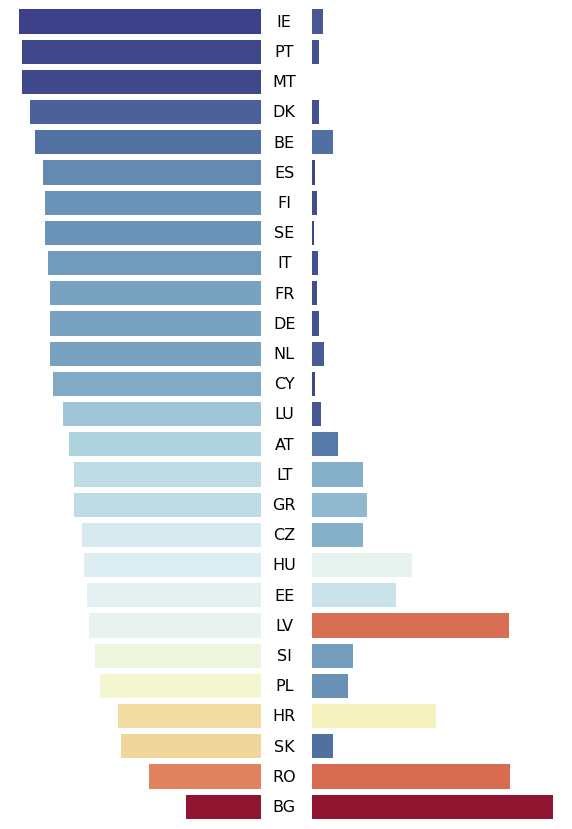

In [10]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 15))

sns.barplot(x=data['Vaccination'], y=data['Country'], ax=ax, 
            palette=plt.cm.RdYlBu(data['Color_Vaccination']))
sns.barplot(x=data['Deaths'], y=data['Country'], ax=ax2, 
            palette=plt.cm.RdYlBu_r(data['Color_Deaths']))
ax.invert_xaxis()

# Remove box with axes, tickmarks, etc
ax.axis('off')
ax2.axis('off')

# Add y tick labels in between the two subplots
data.apply(lambda x: ax.text(x=-9, y=x.y, 
                                           s=x.Country, fontsize=16, 
                                           va='center', ha='center'), axis=1);

And the values for each bar

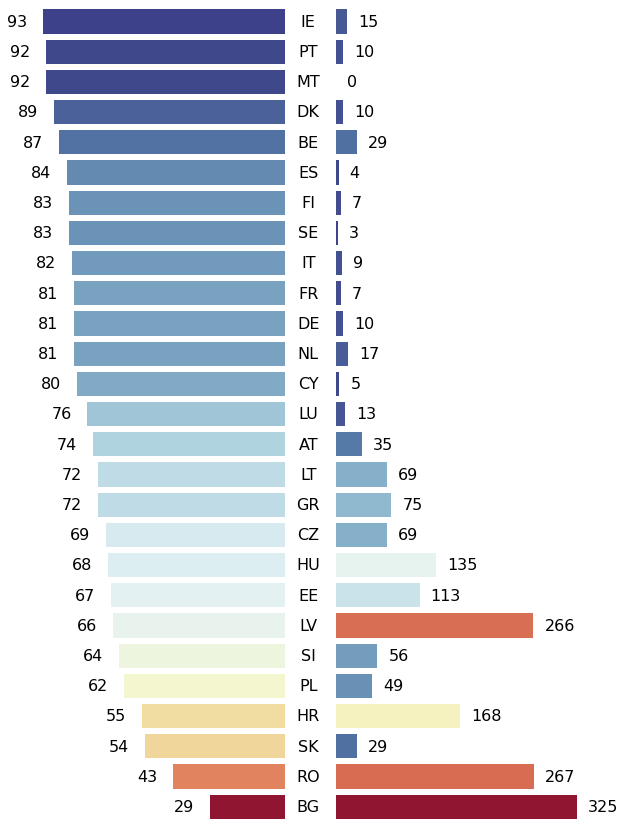

In [11]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 15))

sns.barplot(x=data['Vaccination'], y=data['Country'], ax=ax, 
            palette=plt.cm.RdYlBu(data['Color_Vaccination']))
sns.barplot(x=data['Deaths'], y=data['Country'], ax=ax2, 
            palette=plt.cm.RdYlBu_r(data['Color_Deaths']))
ax.invert_xaxis()

# Remove box with axes, tickmarks, etc
ax.axis('off')
ax2.axis('off')

# Add y tick labels in between the two subplots
data.apply(lambda x: ax.text(x=-9, y=x.y, 
                                           s=x.Country, fontsize=16, 
                                           va='center', ha='center'), axis=1)

# Add x values next to every bar
data.apply(lambda x: ax.text(x=x.Vaccination+10, y=x.y, 
                                           s=x.Vaccination, fontsize=16, 
                                           va='center', ha='center'), axis=1)
data.apply(lambda x: ax2.text(x=x.Deaths+15, y=x.y, 
                                            s=x.Deaths, fontsize=16, 
                                            va='center', ha='left'), axis=1);

And finally, we add the titles and subtitles to each subplot

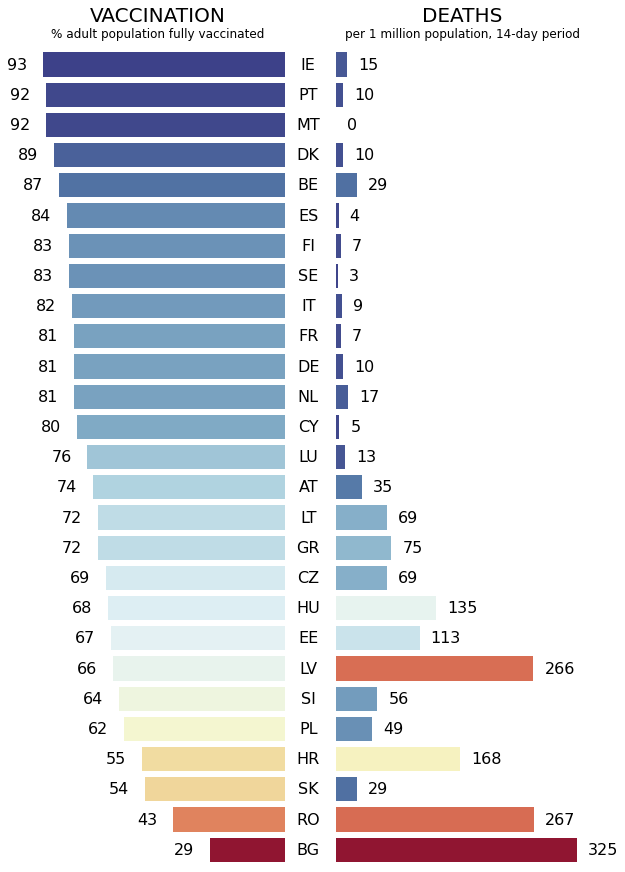

In [12]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 15))

sns.barplot(x=data['Vaccination'], y=data['Country'], ax=ax, 
            palette=plt.cm.RdYlBu(data['Color_Vaccination']))
sns.barplot(x=data['Deaths'], y=data['Country'], ax=ax2, 
            palette=plt.cm.RdYlBu_r(data['Color_Deaths']))
ax.invert_xaxis()

# Remove box with axes, tickmarks, etc
ax.axis('off')
ax2.axis('off')

# Add y tick labels in between the two subplots
data.apply(lambda x: ax.text(x=-9, y=x.y, 
                                           s=x.Country, fontsize=16, 
                                           va='center', ha='center'), axis=1)

# Add x values next to every bar
data.apply(lambda x: ax.text(x=x.Vaccination+10, y=x.y, 
                                           s=x.Vaccination, fontsize=16, 
                                           va='center', ha='center'), axis=1)
data.apply(lambda x: ax2.text(x=x.Deaths+15, y=x.y, 
                                            s=x.Deaths, fontsize=16, 
                                            va='center', ha='left'), axis=1)

# Add title and subtitle to each subplot
(xmin, xmax) = ax.get_xlim()
ax.text(x=(xmin-xmax)/2, y=-1.6, s='Vaccination'.upper(), 
        fontsize=20, va='center', ha='center')
ax.text(x=(xmin-xmax)/2, y=-1.0, s='% adult population fully vaccinated', 
        fontsize=12, va='center', ha='center')

(xmin, xmax) = ax2.get_xlim()
ax2.text(x=(xmax-xmin)/2, y=-1.6, s='Deaths'.upper(), 
         fontsize=20, va='center', ha='center')
ax2.text(x=(xmax-xmin)/2, y=-1.0, s='per 1 million population, 14-day period', 
         fontsize=12, va='center', ha='center');

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>